In [46]:
# GLOBAL VARIABLES
# url for the submission we want the comments from
SUBMISSION_URL = "https://www.reddit.com/r/AskReddit/comments/1hg10tp/whats_your_reason_for_not_drinking_alcohol/"
SAVE_PATH_PQT = "data/askreddit_whats_your_reason_for_not_drinking_alcohol.parquet"

In [38]:
import os
from dotenv import load_dotenv
import praw
import datetime
from datetime import datetime
import pandas as pd
import random
import time

In [39]:
# import the tokens needed to get access to Reddit's API
load_dotenv(dotenv_path=".env")

# for some reason loading the os env does not loat all variables form the file
with open(".env", "r") as file:
    for line in file:
        key, value = line.strip().split("=", 1)
        os.environ[key] = value

# check API tokens were correctly loaded
# print("CLIENT_SECRET:", os.environ.get("CLIENT_SECRET"))
# print("CLIENT_ID:", os.environ.get("CLIENT_ID"))

CLIENT_SECRET = os.environ.get('CLIENT_SECRET')
CLIENT_ID = os.environ.get('CLIENT_ID')

In [40]:
# connect to reddit API
# initialize PRAW with the API credentials
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent="Comment Extraction (by u/South_Summer513)",
    username="South_Summer513",
)

# get submission 
submission = reddit.submission(url=SUBMISSION_URL)

print('submission title:', submission.title)
print('submission author:', submission.author)
print('submission score:', submission.score)
print('submission date (Y-M-D h:m:s):', datetime.fromtimestamp(submission.created_utc))
print('submission upvote_ratio:', submission.upvote_ratio)
print('subreddit:', submission.subreddit)
print('total number of comments: ', submission.num_comments)

submission title: What's your reason for not drinking alcohol?
submission author: Snoo_47323
submission score: 9464
submission date (Y-M-D h:m:s): 2024-12-17 02:56:22
submission upvote_ratio: 0.88
subreddit: AskReddit
total number of comments:  19996


In [41]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)
    break

I grew up around alcohol abuse.


In [105]:
# submission.comments.list()

In [43]:
len(submission.comments.list())

736

In [44]:
print(f"MoreComments remaining: {len(submission.comments.replace_more(limit=None))}")

MoreComments remaining: 0


In [45]:
comments_data = []
count_sec = 0

submission.comments.replace_more(limit=None) # flatten tree
comments = submission.comments.list() # all comments

# get all info for each comment in submission
for comment in comments:
    if comment.author is None or comment.body in ["[deleted]", "[removed]"]:
        continue  # Skip deleted/removed comments
    comment_data = {
        'main_submission_id': submission.id,
        'comment_author': comment.author,
        'comment_body': comment.body,
        'comment_id': comment.id,
        'comment_date_time': datetime.fromtimestamp(comment.created_utc),
        'comment_score': comment.score,
        'comment_parent_id': comment.parent_id,
        'comment_subreddit': comment.subreddit,
        'comment_permalink': comment.permalink,
        'comment_is_submitter': comment.is_submitter,
        'comment_replies': comment.replies,
        'comment_depth': comment.depth,
    }
    comments_data.append(comment_data)
    count_sec += 1

    # sleep to prevent toom many requests error form the API
    if count_sec > 500:
        sleep_time = random.randint(2, 5)
        count_sec = 0
        print(f'dataset size: {len(comments_data)}')
        print(30 * '-')
        time.sleep(sleep_time)
        

dataset size: 501
------------------------------
dataset size: 1002
------------------------------
dataset size: 1503
------------------------------
dataset size: 2004
------------------------------
dataset size: 2505
------------------------------
dataset size: 3006
------------------------------
dataset size: 3507
------------------------------
dataset size: 4008
------------------------------
dataset size: 4509
------------------------------
dataset size: 5010
------------------------------
dataset size: 5511
------------------------------
dataset size: 6012
------------------------------
dataset size: 6513
------------------------------
dataset size: 7014
------------------------------
dataset size: 7515
------------------------------
dataset size: 8016
------------------------------
dataset size: 8517
------------------------------
dataset size: 9018
------------------------------
dataset size: 9519
------------------------------
dataset size: 10020
------------------------------


In [47]:
len(comments_data)

19347

In [ ]:
# Convert to DataFrame
comments_df = pd.DataFrame(comments_data)
comments_df.info()

# there appear to be no Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19347 entries, 0 to 19346
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   main_submission_id    19347 non-null  object        
 1   comment_author        19347 non-null  object        
 2   comment_body          19347 non-null  object        
 3   comment_id            19347 non-null  object        
 4   comment_date_time     19347 non-null  datetime64[ns]
 5   comment_score         19347 non-null  int64         
 6   comment_parent_id     19347 non-null  object        
 7   comment_subreddit     19347 non-null  object        
 8   comment_permalink     19347 non-null  object        
 9   comment_is_submitter  19347 non-null  bool          
 10  comment_replies       19347 non-null  object        
 11  comment_depth         19347 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 1.6+ MB


In [49]:
comments_df.head()

,main_submission_id,comment_author,comment_body,comment_id,comment_date_time,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
0,1hg10tp,Totallycasual,I grew up around alcohol abuse.,m2fq33p,2024-12-17 02:57:11,6032,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"(m2g5v5v, m2g9j26, m2g7z9q, m2gc6pk, m2gvhjd, ...",0
1,1hg10tp,666Needle-Dick,Because I always overdo it and have a hard tim...,m2fsp7h,2024-12-17 03:13:35,9961,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"(m2gu1eu, m2g19qy, m2g9tzo, m2gcif7, m2gcihm, ...",0
2,1hg10tp,Homelessnomore,I want to keep my username.,m2ft95c,2024-12-17 03:17:11,17753,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"(m2g5ssm, m2g5sst, m2gh003, m2gg3ca, m2h6u0g, ...",0
3,1hg10tp,PurposeDramatic2468,"Social drinker, and not a social person most t...",m2fqdvq,2024-12-17 02:59:02,6401,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"(m2h6rur, m2gdbsr, m2hf09p, m2hb2pe, m2hekfv, ...",0
4,1hg10tp,ocshoppers,Can't handle the hangovers anymore. They now l...,m2fqpbf,2024-12-17 03:00:59,7543,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"(m2fs3tm, m2gaan7, m2g6kft, m2gdx4j, m2g9yhr, ...",0


In [50]:
# check for empty strings in the comment text body
comments_df[comments_df['comment_body'] == '']

# all comments have text body

,main_submission_id,comment_author,comment_body,comment_id,comment_date_time,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth


In [55]:
# check duplicated comments (bots? adds?)
duplicates = comments_df.duplicated(subset=['comment_author', 'comment_body'], keep=False)
comments_df[duplicates].sort_values(by='comment_body')

# there appear to be duplicated comments made by the same user

,main_submission_id,comment_author,comment_body,comment_id,comment_date_time,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
3129,1hg10tp,6feetall,Because I love my liver.,m2grahz,2024-12-17 08:02:29,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
3134,1hg10tp,6feetall,Because I love my liver.,m2graze,2024-12-17 08:02:37,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
9069,1hg10tp,Gothos73,Crazy heartburn that ruins the experience. But...,m2ibucp,2024-12-17 15:50:43,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
9065,1hg10tp,Gothos73,Crazy heartburn that ruins the experience. But...,m2ibt8f,2024-12-17 15:50:33,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
9059,1hg10tp,Gothos73,Crazy heartburn that ruins the experience. But...,m2ibrlr,2024-12-17 15:50:18,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
3987,1hg10tp,vdm1892,"Different, but I switched to beer only",m2h0l8i,2024-12-17 09:49:04,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
3990,1hg10tp,vdm1892,"Different, but I switched to beer only",m2h0lpr,2024-12-17 09:49:13,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
2846,1hg10tp,C_okoko,Drinking,m2go2lv,2024-12-17 07:28:16,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
3867,1hg10tp,C_okoko,Drinking,m2gzfdv,2024-12-17 09:35:36,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0
6714,1hg10tp,DigitalGoosey,"Expensive, doesnt taste good, is a literal poi...",m2hqijh,2024-12-17 13:42:33,1,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,(),0


In [97]:
# remove duplicated comments, keep just the first instance
comments_df_unique = comments_df.drop_duplicates(subset=['comment_author', 'comment_body'], keep='first').reset_index(drop=True)
comments_df_unique.info()

# 19326 unique comments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   main_submission_id    19326 non-null  object        
 1   comment_author        19326 non-null  object        
 2   comment_body          19326 non-null  object        
 3   comment_id            19326 non-null  object        
 4   comment_date_time     19326 non-null  datetime64[ns]
 5   comment_score         19326 non-null  int64         
 6   comment_parent_id     19326 non-null  object        
 7   comment_subreddit     19326 non-null  object        
 8   comment_permalink     19326 non-null  object        
 9   comment_is_submitter  19326 non-null  bool          
 10  comment_replies       19326 non-null  object        
 11  comment_depth         19326 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 1.6+ MB


In [98]:
# how many unique authors responded
n_unique_authors = comments_df_unique['comment_author'].nunique()
print('number of unique users who responded:', n_unique_authors)

comments_df_unique['comment_author'].value_counts().head(10)

# 18038 unique users repsonded 

number of unique users who responded: 18038


comment_author
PajammaDrunk            22
Homelessnomore          17
Racing-Type13           16
CraftBeerFomo           16
AutismDenialDisorder    14
Asleep-Lavishness332    14
Ok_Reality5346          13
tanarchy7               12
MarvMartin              12
Neither-Party2101       11
Name: count, dtype: int64

Submission posted on (Y-M-D h:m:s): 2024-12-17 02:56:22


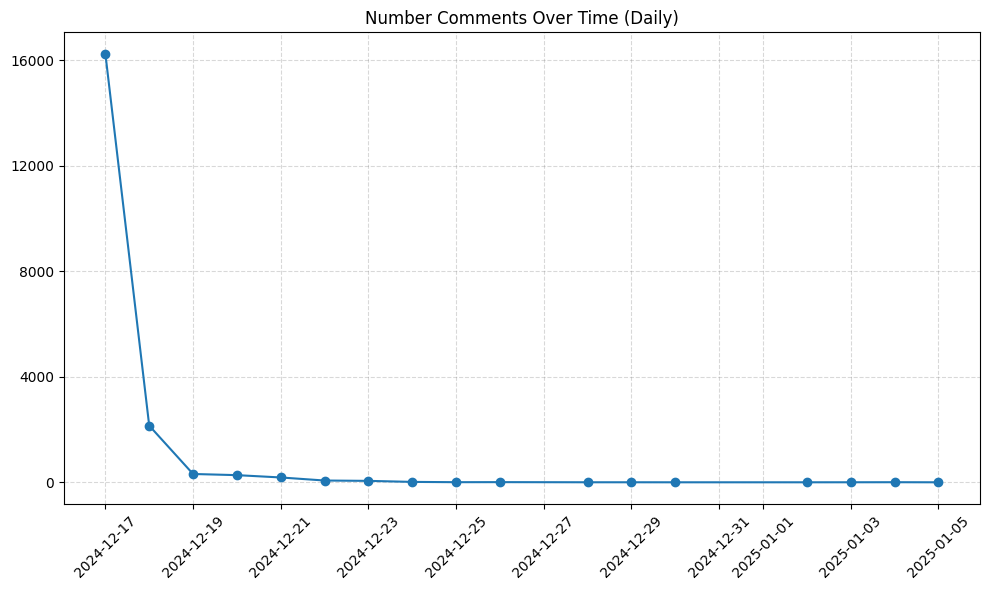

In [99]:
# When were the respnoses made?
import matplotlib.pyplot as plt

print('Submission posted on (Y-M-D h:m:s):', datetime.fromtimestamp(submission.created_utc))


# Group by day and count the comments
comments_per_day = comments_df_unique.groupby(comments_df_unique['comment_date_time'].dt.date).size()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(comments_per_day.index, comments_per_day.values, marker='o')
plt.xlabel('')
plt.ylabel('')
plt.title('Number Comments Over Time (Daily)')

# Customize grid
plt.grid(True, color='grey', linestyle='--', alpha=0.3)  # Faded grey grid lines

# Set y-ticks to show every 2000 counts
y_ticks = range(0, comments_per_day.max() + 2000, 4000)
plt.yticks(y_ticks)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# most of the comments were made on the day of the submission

In [100]:
# saving as parquet to retain the datatypes 
# Redditor, subReddit and CommentForest objects are not recognised as data type so we need to change them to strings
comments_df_unique['comment_author'] = comments_df_unique['comment_author'].apply(lambda x: str(x))
comments_df_unique['comment_subreddit'] = comments_df_unique['comment_subreddit'].apply(lambda x: str(x)) 

# commentForest is a tuple of Comment objects ids -> save it as list of comment ids
comments_df_unique['comment_replies'] = comments_df_unique['comment_replies'].apply(lambda x: [comment.id for comment in x] ) 
comments_df_unique.head()

,main_submission_id,comment_author,comment_body,comment_id,comment_date_time,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
0,1hg10tp,Totallycasual,I grew up around alcohol abuse.,m2fq33p,2024-12-17 02:57:11,6032,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"[m2g5v5v, m2g9j26, m2g7z9q, m2gc6pk, m2gvhjd, ...",0
1,1hg10tp,666Needle-Dick,Because I always overdo it and have a hard tim...,m2fsp7h,2024-12-17 03:13:35,9961,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"[m2gu1eu, m2g19qy, m2g9tzo, m2gcif7, m2gcihm, ...",0
2,1hg10tp,Homelessnomore,I want to keep my username.,m2ft95c,2024-12-17 03:17:11,17753,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"[m2g5ssm, m2g5sst, m2gh003, m2gg3ca, m2h6u0g, ...",0
3,1hg10tp,PurposeDramatic2468,"Social drinker, and not a social person most t...",m2fqdvq,2024-12-17 02:59:02,6401,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"[m2h6rur, m2gdbsr, m2hf09p, m2hb2pe, m2hekfv, ...",0
4,1hg10tp,ocshoppers,Can't handle the hangovers anymore. They now l...,m2fqpbf,2024-12-17 03:00:59,7543,t3_1hg10tp,AskReddit,/r/AskReddit/comments/1hg10tp/whats_your_reaso...,False,"[m2fs3tm, m2gaan7, m2g6kft, m2gdx4j, m2g9yhr, ...",0


In [104]:
# comments_df_unique['comment_replies'][0]

In [103]:
# save the comments dataframe as parquet file
comments_df_unique.to_parquet(SAVE_PATH_PQT, engine='pyarrow')